In [ ]:
# Install necessary libraries (only if not installed in Colab)
!pip install xgboost scikit-learn pandas

# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the datasets
# Replace these paths with the correct file paths in Colab
original_dataset_path = '/content/final_dataset.csv'
validation_dataset_path = '/content/reallife_dataset.csv'

original_data = pd.read_csv(original_dataset_path)
validation_data = pd.read_csv(validation_dataset_path)

# Separate features and target variable in both datasets
X_train = original_data.drop(columns=['HPV'])
y_train = original_data['HPV']

X_validation = validation_data.drop(columns=['HPV'])
y_validation = validation_data['HPV']

# Initialize and train the XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_estimators=20, max_depth=3)
model.fit(X_train, y_train)

# Validate the model on the validation dataset
y_validation_pred = model.predict(X_validation)
y_validation_pred_proba = model.predict_proba(X_validation)[:, 1]

# Generate the classification report and confusion matrix
classification_rep = classification_report(y_validation, y_validation_pred)
conf_matrix = confusion_matrix(y_validation, y_validation_pred)

# Print the results
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

# Optional: Save the model for future use
import joblib
model_filename = "xgboost_model.pkl"
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}")

# To load the model later, use:
# loaded_model = joblib.load(model_filename)


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        79
           1       1.00      0.94      0.97        16

    accuracy                           0.99        95
   macro avg       0.99      0.97      0.98        95
weighted avg       0.99      0.99      0.99        95

Confusion Matrix:
 [[79  0]
 [ 1 15]]
Model saved to xgboost_model.pkl


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:07:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


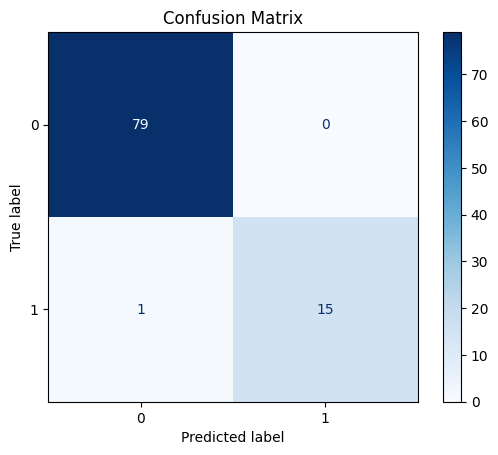

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot the confusion matrix as a heatmap
ConfusionMatrixDisplay.from_predictions(y_validation, y_validation_pred, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

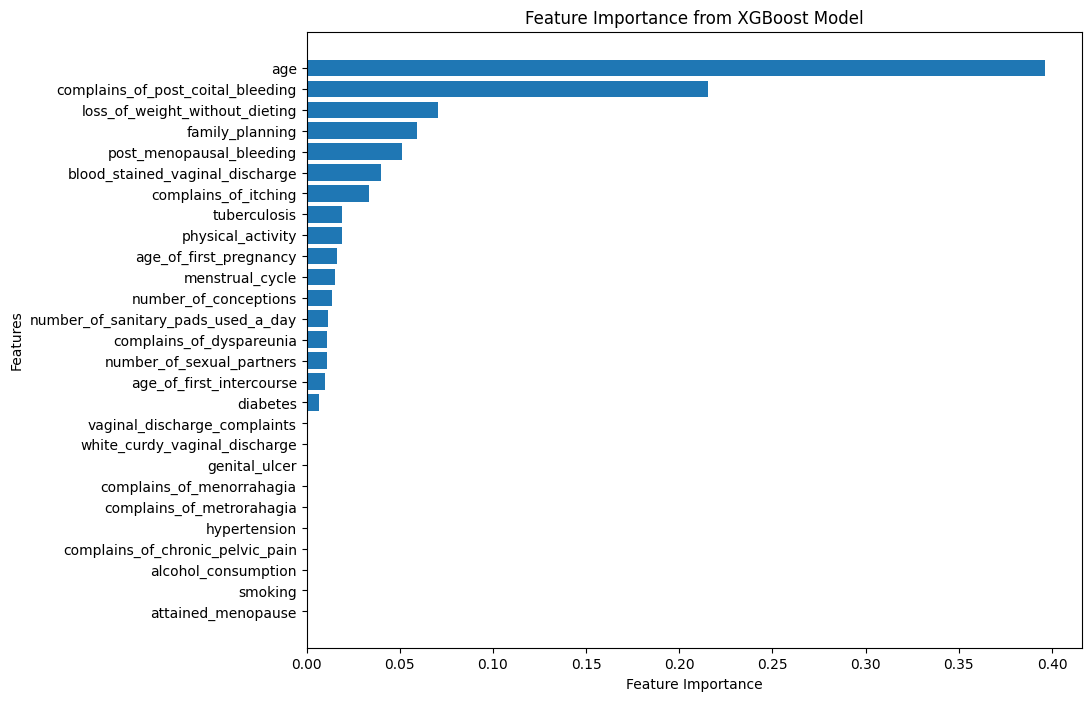

In [ ]:
# Plot feature importance
feature_importance = model.feature_importances_
sorted_idx = feature_importance.argsort()
plt.figure(figsize=(10, 8))
plt.barh([feature_names[i] for i in sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance from XGBoost Model")
plt.show()

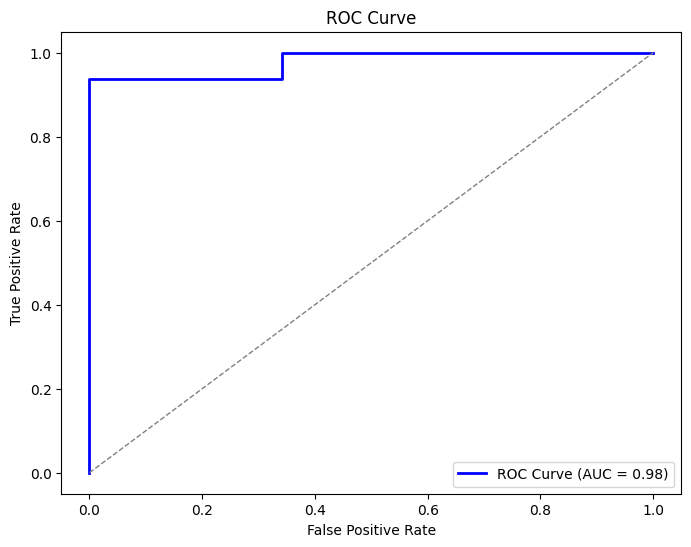

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_validation, y_validation_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

report_dict = classification_report(y_validation, y_validation_pred, output_dict=True)
classification_report_df = pd.DataFrame(report_dict).transpose()

# Display or save the table
print(classification_report_df)
classification_report_df.to_csv("classification_report.csv", index=True)

              precision    recall  f1-score    support
0              0.987500  1.000000  0.993711  79.000000
1              1.000000  0.937500  0.967742  16.000000
accuracy       0.989474  0.989474  0.989474   0.989474
macro avg      0.993750  0.968750  0.980726  95.000000
weighted avg   0.989605  0.989474  0.989337  95.000000


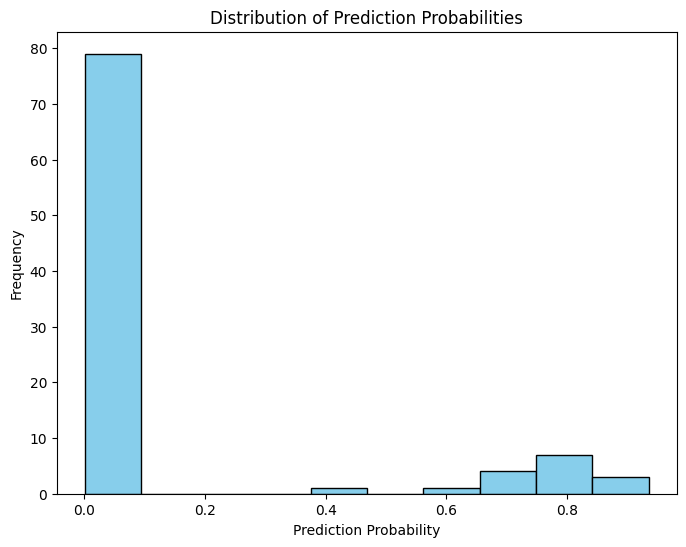

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(y_validation_pred_proba, bins=10, color="skyblue", edgecolor="black")
plt.title("Distribution of Prediction Probabilities")
plt.xlabel("Prediction Probability")
plt.ylabel("Frequency")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Install necessary libraries (only if not installed in Colab)
!pip install xgboost scikit-learn pandas

# Import required libraries
import pandas as pd
import joblib
import numpy as np

# Load the trained XGBoost model
model_filename = "xgboost_model.pkl"
model = joblib.load(model_filename)

# Feature names as in the dataset (excluding the target column 'HPV')
feature_names = [
    "age", "smoking", "alcohol_consumption", "physical_activity", "diabetes",
    "hypertension", "tuberculosis", "age_of_first_intercourse",
    "number_of_sexual_partners", "menstrual_cycle","number_of_sanitary_pads_used_a_day", "attained_menopause",
    "age_of_first_pregnancy","number_of_conceptions", "family_planning","post_menopausal_bleeding","vaginal_discharge_complaints", "blood_stained_vaginal_discharge",
    "white_curdy_vaginal_discharge", "complains_of_menorrahagia",
    "complains_of_metrorahagia", "complains_of_chronic_pelvic_pain",
    "genital_ulcer", "complains_of_itching", "complains_of_dyspareunia",
    "complains_of_post_coital_bleeding", "loss_of_weight_without_dieting"
]

# Function to get input from the user for all features
def get_user_input():
    user_data = {}
    print("Enter the following details:")
    for feature in feature_names:
        value = input(f"{feature}: ")
        # Convert inputs to float or integer if needed
        try:
            value = float(value) if "." in value else int(value)
        except ValueError:
            print(f"Invalid value for {feature}. Please enter a numeric value.")
            return None
        user_data[feature] = value
    return pd.DataFrame([user_data])

# Function to make predictions
def make_prediction(input_data):
    # Ensure input data has the same feature order as the model
    input_data = input_data[feature_names]
    prediction = model.predict(input_data)
    prediction_proba = model.predict_proba(input_data)
    return prediction[0], prediction_proba[0]

# Main interactive program
print("HPV Diagnosis System")
print("--------------------")
user_data = get_user_input()
if user_data is not None:
    prediction, prediction_proba = make_prediction(user_data)
    if prediction == 1:
        print(f"\nResult: The patient is classified as HPV Positive (Risk Detected).")
    else:
        print(f"\nResult: The patient is classified as HPV Negative (No Risk Detected).")
    print(f"Probability of Positive (HPV): {prediction_proba[1]:.2f}")
    print(f"Probability of Negative (No HPV): {prediction_proba[0]:.2f}")


HPV Diagnosis System
--------------------
Enter the following details:
age: 56
smoking: 1
alcohol_consumption: 0
physical_activity: 1
diabetes: 1
hypertension: 0
tuberculosis: 1
age_of_first_intercourse: 25
number_of_sexual_partners: 2
menstrual_cycle: 1
number_of_sanitary_pads_used_a_day: 4
attained_menopause: 1
age_of_first_pregnancy: 25
number_of_conceptions: 2
family_planning: 0
post_menopausal_bleeding: 1
vaginal_discharge_complaints: 1
blood_stained_vaginal_discharge: 1
white_curdy_vaginal_discharge: 1
complains_of_menorrahagia: 0
complains_of_metrorahagia: 1
complains_of_chronic_pelvic_pain: 0
genital_ulcer: 1
complains_of_itching: 1
complains_of_dyspareunia: 0
complains_of_post_coital_bleeding: 1
loss_of_weight_without_dieting: 1

Result: The patient is classified as HPV Negative (No Risk Detected).
Probability of Positive (HPV): 0.18
Probability of Negative (No HPV): 0.82
